In [166]:
import pandas as pd


final_dataset_loc = 'C:/Users/killi/KF_Repo/PGA_Golf/Python_Scripts/Rugby_Union/3. Clean Data/final_dataset_cleaned.csv'

final_dataset_df = pd.read_csv(final_dataset_loc)


# Split between home and away
home_team_df = final_dataset_df[['date',
'home_team', 'away_team','home_score','away_score',
'Home_tries','Home_conv','Home_pg_dg','Away_tries','Away_pg_dg'
]]

# Set Home indicator as 1
home_team_df['Home_ind'] = 1

home_team_df = home_team_df.rename(columns={"home_team": "team",
                                            "away_team": "opponent",
                                            "home_score": "score",
                                            "away_score": "opp_score",
                                            'Away_tries': "opp_tries",
                                            'Away_pg_dg': "opp_pg_dg",
                                            'Home_tries': 'tries',
                                            'Home_conv': 'conv',
                                            'Home_pg_dg': 'pg_dg'
                                           })

# Get Away team
away_team_df = final_dataset_df[['date',
'away_team', 'home_team','away_score','home_score',
'Away_tries','Away_conv','Away_pg_dg','Home_tries','Home_pg_dg'
]]

# Set Home indicator as 0
away_team_df['Home_ind'] = 0

away_team_df = away_team_df.rename(columns={"away_team": "team",
                                            "home_team": "opponent",
                                            "away_score": "score",
                                            "home_score": "opp_score",
                                            'Home_tries': 'opp_tries',
                                            'Home_pg_dg': 'opp_pg_dg',
                                            'Away_tries': 'tries',
                                            'Away_conv': 'conv',
                                            'Away_pg_dg': 'pg_dg'
                                           })

# Combine home and away df
combine_df = pd.concat([home_team_df,away_team_df])

# Update world cup games to have Home indicator as 0 
# Unless its France
combine_df.loc[(combine_df['team'] != 'France') & (combine_df['date'] < '2024-01-01') , 'Home_ind'] = 0



C:\Users\killi\AppData\Local\Temp\ipykernel_23144\2404349216.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_team_df['Home_ind'] = 1
C:\Users\killi\AppData\Local\Temp\ipykernel_23144\2404349216.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_team_df['Home_ind'] = 0


In [167]:


# Take values up until Test period
#train_data = combine_df[combine_df['date'] <=  '2024-10-06']

# Keep November internationals as Test data
#test_data = combine_df[(combine_df['date'] > '2024-10-06')] 

# Use all train data
train_data = combine_df

# Use full dataset to get predictions for Six Nations
print(len(combine_df))
print(len(train_data))
#print(len(test_data))


316
316


In [30]:
# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
#combine_df[(combine_df['date'] < '2024-01-01')]


In [168]:
# Identify teams to remove based on counts

import numpy as np

teams_unq = train_data['team'].unique()
opp_unq = train_data['opponent'].unique()

# Concatenate the arrays and keep unique values
unique_teams = np.unique(np.concatenate((teams_unq, opp_unq)))

# Sort the unique_teams list alphabetically
unique_teams_sorted = sorted(unique_teams)

# get number of teams
n_teams = len(unique_teams_sorted)
print(n_teams)

# Create the mapping (team name to index starting from 0)
team_mapping = {team: index for index, team in enumerate(unique_teams_sorted)}

# Print the mapping
print(team_mapping)

# Map the teams to numbers
train_data['team_num'] = train_data['team'].map(team_mapping)
train_data['opp_num'] = train_data['opponent'].map(team_mapping)





33
{'Argentina': 0, 'Australia': 1, 'Belgium': 2, 'Brazil': 3, 'Canada': 4, 'Chile': 5, 'England': 6, 'Fiji': 7, 'France': 8, 'Georgia': 9, 'Hong Kong': 10, 'Ireland': 11, 'Italy': 12, 'Japan': 13, 'Kenya': 14, 'Namibia': 15, 'Netherlands': 16, 'New Zealand': 17, 'Paraguay': 18, 'Portugal': 19, 'Romania': 20, 'Samoa': 21, 'Scotland': 22, 'South Africa': 23, 'South Korea': 24, 'Spain': 25, 'Tonga': 26, 'USA': 27, 'Uganda': 28, 'United Arab Emirates': 29, 'Uruguay': 30, 'Wales': 31, 'Zimbabwe': 32}


In [96]:
# Take sample of 3 observations

# Skip this section
test_data = test_data.reset_index(drop=True)

test_data_sample = test_data.iloc[[0,39]]

# get home and away values from test set
team_test = test_data_sample['team_num'].values.astype(int)
opp_test = test_data_sample['opp_num'].values.astype(int)
team_home_ind_test = test_data_sample['Home_ind'].values.astype(int)

with nb_model:
     pm.set_data({"team_shared": team_test,
                  "opp_shared": opp_test,
                  "team_home_ind_shared": team_home_ind_test
                 })
     ppc_test = pm.sample_posterior_predictive(trace)
     ppc_test_model_score = ppc_test.posterior_predictive.score_model.stack(sample=("chain", "draw"))



NameError: name 'test_data' is not defined

In [ ]:
# Old code

# Remove Home indicator parts
#team_home_ind_shared = pm.MutableData("team_home_ind_shared", train_data['Home_ind'].values)
# Parameter for Home - Remove for now  - coefficient crossed 0 in 95% range
#home_param_tries = pm.Normal("home_param_tries", 0, 0.5)
#home_param_pg_dg = pm.Normal("home_param_pg_dg", 0, 0.5)
# home_param_tries*team_home_ind_shared
# +home_param_pg_dg*team_home_ind_shared

    # Defence ratings for teams - common mu and sd that all teams draw from
    #defs_mu_tries = pm.Normal("defs_mu_tries", 0, 0.5)
    #defs_sd_tries = pm.HalfNormal("defs_sd_tries", 0.5)
    #defs_tries = pm.Normal("defs_tries", mu=defs_mu_tries, sigma=defs_sd_tries, shape=n_teams)

    # Defence ratings for teams - common mu and sd that all teams draw from
    #defs_mu_pg_dg = pm.Normal("defs_mu_pg_dg", 0, 0.5)
    #defs_sd_pg_dg = pm.HalfNormal("defs_sd_pg_dg", 0.5)
    #defs_pg_dg = pm.Normal("defs_pg_dg", mu=defs_mu_pg_dg, sigma=defs_sd_pg_dg, shape=n_teams)

    # Create a parameter for kickers - wide priors
    #kick_mu = pm.Normal("kick_mu", 0, 3)
    #kick_sd = pm.HalfNormal("kick_sd", 3)
    #kick = pm.Normal("kick", mu=kick_mu, sigma=kick_sd, shape=n_teams)
#p_conv = pm.Deterministic("p_conv", pm.math.invlogit(kick[team_shared] ))

    # Attack ratings for teams - common mu and sd that all teams draw from
    #atts_mu_tries = pm.Normal("atts_mu_tries", 0, 1)
    #atts_sd_tries = pm.HalfNormal("atts_sd_tries", 1)
    #atts_tries = pm.Normal("atts_tries", mu=atts_mu_tries, sigma=atts_sd_tries, shape=n_teams)

    # Attack ratings for teams - penalties
    #atts_mu_pg_dg = pm.Normal("atts_mu_pg_dg", 0, 1)
    #atts_sd_pg_dg = pm.HalfNormal("atts_sd_pg_dg", 1)
    #atts_pg_dg = pm.Normal("atts_pg_dg", mu=atts_mu_pg_dg, sigma=atts_sd_pg_dg, shape=n_teams)

    #pg_dg_theta = pm.Deterministic("pg_dg_theta", 
                                   #pm.math.exp(atts_pg_dg[team_shared] + defs[opp_shared]    
                                        ))

    # b_type_region = pm.Normal('b_type_region', mu=0, sigma=10, dims=('type', 'region'))
    # b_type_region[sr_type.cat.codes, sr_region.cat.codes]


In [222]:
# Use Negative Binomial Model
import pymc as pm

# Create Model
with pm.Model() as nb_model:

    # Think this is the only shared data I need
    team_shared = pm.MutableData("team_shared", train_data['team_num'].values)
    opp_shared = pm.MutableData("opp_shared", train_data['opp_num'].values)
    team_home_ind_shared = pm.MutableData("team_home_ind_shared", train_data['Home_ind'].values)

    # Param for Home to be used for tries
    home_param_tries = pm.Normal("home_param_tries", 0, 1)
    
    # Data used for Likelihoods in Model - all observed
    team_tries = train_data['tries'].values
    team_conv =  train_data['conv'].values
    team_pg_dg =  train_data['pg_dg'].values

    # Attack ratings for teams - common mu and sd that all teams draw from
    atts_mu = pm.Normal("atts_mu", 0, 1)
    atts_sd = pm.HalfNormal("atts_sd", 1)
    atts = pm.Normal("atts", mu=atts_mu, sigma=atts_sd, shape=n_teams)

    # Have 1 common defence parameter
    defs_mu = pm.Normal("defs_mu", 0, 1)
    defs_sd = pm.HalfNormal("defs_sd", 1)
    defs = pm.Normal("defs", mu=defs_mu, sigma=defs_sd, shape=n_teams)

    # coefficient for team interaction
    # right now I have (attack team, defence team)
    # So (France, Wales) could be different to (Wales, France)
    team_interaction = pm.Normal("team_interaction", mu=0, sigma=1, shape=(n_teams, n_teams) )



    # Calculate theta for tries and pg dg
    # Added an interaction term to show how teams match up
    tries_theta = pm.Deterministic("tries_theta", pm.math.exp(home_param_tries*team_home_ind_shared 
                                                        + atts[team_shared]
                                                        + defs[opp_shared]
                                                        + team_interaction[team_shared, opp_shared]
                                                             ) )

    # Create alpha - Gamma shape parameter
    alpha_tries = pm.HalfNormal("alpha_tries",2)

    # Negative Binomial for tries
    tries_nb = pm.NegativeBinomial("tries_nb",
                                   mu=tries_theta, 
                                      alpha=alpha_tries, 
                                        observed=team_tries,
                                        shape = tries_theta.shape)

    # Kicking parameter - changed to beta distribution
    kick = pm.Beta("kick", alpha=2, beta=2)
    p_conv = pm.Deterministic("p_conv", kick)


    # Estimating p_home_conv and p_away_conv here - have data for n and observed
    # Changed N to home_tries_nb from home_tries
    conv_bin =  pm.Binomial("conv_bin",
                                 n=tries_nb, 
                                 p=p_conv, 
                                 observed= team_conv,
                                shape = p_conv.shape)

    

    # Attack ratings for teams - penalties
    atts_mu_pg_dg = pm.Normal("atts_mu_pg_dg", 0, 1)
    atts_sd_pg_dg = pm.HalfNormal("atts_sd_pg_dg", 1)
    atts_pg_dg = pm.Normal("atts_pg_dg", mu=atts_mu_pg_dg, sigma=atts_sd_pg_dg, shape=n_teams)

    # Defence ratings for pg dg
    # I think these have to be separate - as when its a walkover pg dg will be 0
    # So this would be a low value for defence, but lots of tries let in which will be high
    defs_mu_pg_dg = pm.Normal("defs_mu_pg_dg", 0, 1)
    defs_sd_pg_dg = pm.HalfNormal("defs_sd_pg_dg", 1)
    defs_pg_dg = pm.Normal("defs_pg_dg", mu=defs_mu_pg_dg, sigma=defs_sd_pg_dg, shape=n_teams)

    # Removing Defence seemed to help
    # Its now just dependent on that team
    pg_dg_theta = pm.Deterministic("pg_dg_theta", 
                                   pm.math.exp(atts_pg_dg[team_shared] + defs[opp_shared] ))

    
    # Create alpha - Gamma shape parameter for penalties
    alpha_pg_dg = pm.HalfNormal("alpha_pg_dg",2)

    # Negative Binomial for pg dg
    pg_dg_nb = pm.NegativeBinomial("pg_dg_nb",
                                    mu= pg_dg_theta, 
                                    alpha=alpha_pg_dg, 
                                    observed=team_pg_dg,
                                    shape = pg_dg_theta.shape)


    # Get prior samples
    prior_samples = pm.sample_prior_predictive(100)

# Create Model
with nb_model:
    trace = pm.sample(1000, tune=2000, cores=4, return_inferencedata=True)


# Define home_score_model and away_score_model in posterior predictive step
with nb_model:
    score_model = pm.Deterministic("score_model", tries_nb * 5 + conv_bin * 2 + pg_dg_nb * 3)
    
    # Sample from posterior predictive
    posterior_predictive_samples = pm.sample_posterior_predictive(trace,extend_inferencedata=True)



Sampling: [alpha_pg_dg, alpha_tries, atts, atts_mu, atts_mu_pg_dg, atts_pg_dg, atts_sd, atts_sd_pg_dg, conv_bin, defs, defs_mu, defs_mu_pg_dg, defs_pg_dg, defs_sd, defs_sd_pg_dg, home_param_tries, kick, pg_dg_nb, team_interaction, tries_nb]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [home_param_tries, atts_mu, atts_sd, atts, defs_mu, defs_sd, defs, team_interaction, alpha_tries, kick, atts_mu_pg_dg, atts_sd_pg_dg, atts_pg_dg, defs_mu_pg_dg, defs_sd_pg_dg, defs_pg_dg, alpha_pg_dg]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 1116 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 2405 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [conv_bin, pg_dg_nb, tries_nb]


In [223]:
# Then try and see predicted scores for six nations
# Create data for week 1 six nations

week_1_data = {'Team': ['France', 
              'Wales',
              'Scotland',
              'Italy',
              'Ireland',
              'England'
             ], 'Opp': ['Wales', 'France','Italy','Scotland','England','Ireland'], 
               'Home_Ind': [1,0,1,0,1,0]}
week_1_df = pd.DataFrame(data=week_1_data)

# Apply mappings
week_1_df['team_num'] = week_1_df['Team'].map(team_mapping)
week_1_df['opp_num'] = week_1_df['Opp'].map(team_mapping)

# Run six nations data through the model
# "team_home_ind_shared": week_1_df.Home_Ind.values
with nb_model:
     pm.set_data({"team_shared": week_1_df.team_num.values,
                  "opp_shared": week_1_df.opp_num.values,
                  "team_home_ind_shared": week_1_df.Home_Ind.values
                 })
     ppc_sn_1 = pm.sample_posterior_predictive(trace)
     ppc_sn_1_model_score = ppc_sn_1.posterior_predictive.score_model.stack(sample=("chain", "draw"))


# Calculate the median for each row
row_medians = np.median(ppc_sn_1_model_score, axis=1)


print("Row Medians:", row_medians)
# Row Medians: [31. 19. 31. 18. 24. 21.]
# [33. 17. 29. 19. 22. 22.]
# [32.  15.  28.5 17.  22.  21. ]
#  [32. 16. 28. 18. 23. 22.]
# [31. 17. 30. 17. 24. 20.]
# [30.  17.5 32.  17.5 21.  15. ]
#  [30. 17. 33. 18. 21. 15.]
# [32. 17. 31. 17. 24. 21.]
# [39. 19. 28. 21. 17. 32.]

# interaction included - not that different - England winning - probably interaction
# France score has increased
#[35. 17. 27. 22. 21. 22.]

Sampling: [conv_bin, pg_dg_nb, tries_nb]


Row Medians: [35. 17. 27. 22. 21. 22.]


In [210]:
# get tries
ppc_sn_1_tries =ppc_sn_1.posterior_predictive.tries_nb.stack(sample=("chain", "draw"))
tries_median = np.median(ppc_sn_1_tries,axis=1)
print('median tries: ',tries_median)

ppc_sn_1_pg_dg =ppc_sn_1.posterior_predictive.pg_dg_nb.stack(sample=("chain", "draw"))
pg_dg_median = np.median(ppc_sn_1_pg_dg,axis=1)
print('median pg dg: ',pg_dg_median)

                                                            

median tries:  [5.  2.  4.  2.  2.  3.5]
median pg dg:  [2. 1. 1. 1. 1. 2.]


In [190]:
# Try plot model scores
# Change this for each team
home_scores = ppc_sn_1_model_score[4].values
away_scores =  ppc_sn_1_model_score[5].values

In [191]:
# Compare each corresponding France and Wales score
home_win_percentage = np.mean(home_scores > away_scores) 
away_win_percentage = np.mean(away_scores > home_scores) 
draw_percentage = np.mean(home_scores == away_scores) 
print(home_win_percentage)
print(away_win_percentage)
print(draw_percentage)
print('home_odds: ',1/home_win_percentage)
print('away odds: ',1/away_win_percentage)
print('draw odds: ', 1/draw_percentage)

0.56375
0.417
0.01925
home_odds:  1.7738359201773837
away odds:  2.3980815347721824
draw odds:  51.94805194805195


In [193]:
# Compute the combined total
# THink there may be a problem with the combined scores
# Median is not additive - 50% above and below
# The large values in 1 pull the median up
combined_scores = home_scores + away_scores

# Calculate the percentage of times the total is greater than 50
# Set line
line = 43.5

median_score = np.median(combined_scores)
print('median score: ',median_score)
median_home = np.median(home_scores)
median_away = np.median(away_scores)
print('median home: ',median_home)
print('median away: ', median_away)

over_percentage = np.mean(combined_scores > line)
under_percentage = np.mean(combined_scores < line)
print('over percentage: ',over_percentage)
print('under percentage: ',under_percentage)


median score:  49.0
median home:  25.0
median away:  21.0
over percentage:  0.6045
under percentage:  0.3955


In [194]:
# Compute the combined total
spread_scores = home_scores - away_scores

# Calculate the percentage of times the total is greater than 50
# Set line
line = 7.5

median_spread = np.median(spread_scores)
print('median spread: ',median_spread)


cover_spread = np.mean(spread_scores > line)
no_cover_spread = np.mean(spread_scores < line)
print('cover_spread: ',cover_spread)
print('no cover spread: ',no_cover_spread)

median spread:  4.0
cover_spread:  0.431
no cover spread:  0.569


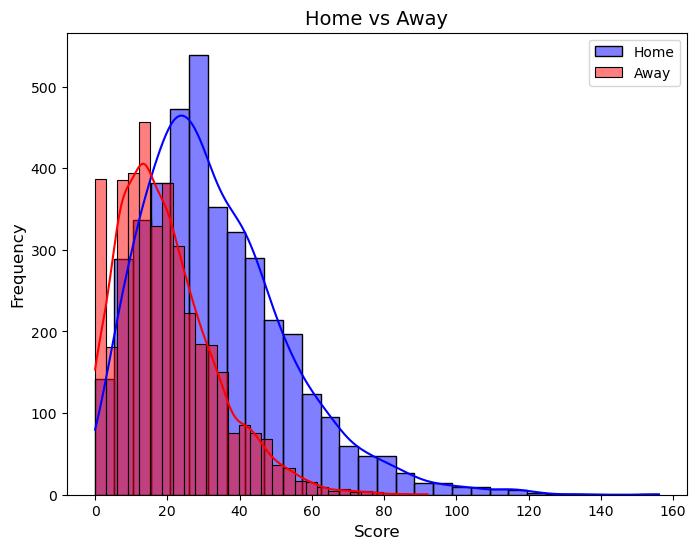

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(8, 6))

# Plot France scores
sns.histplot(home_scores, bins=30, kde=True, color='blue', label="Home", alpha=0.5)

# Plot Wales scores
sns.histplot(away_scores, bins=30, kde=True, color='red', label="Away", alpha=0.5)

# Add labels and title
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Home vs Away", fontsize=14)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [11]:
# France vs Wales
# Over is 57.5
# Handicap is 27.5
# Remaining points is 30 - divided by 2
# They expect France to win 42 to 15
# My model is saying 30 to 17 - 4 tries to 2
# 2 tries seems reasonable for Wales
# But why is the France score so low


week_1_df

,Team,Opp,Home_Ind,team_num,opp_num
0,France,Wales,1,8,31
1,Wales,France,0,31,8
2,Scotland,Italy,1,22,12
3,Italy,Scotland,0,12,22
4,Ireland,England,1,11,6
5,England,Ireland,0,6,11


In [76]:
# Average mu
np.exp(0.47)

1.5999941932173602

In [77]:
# average defence - this is multiplied
np.exp(0.66)

1.9347923344020317

In [79]:
# Average tries
np.exp(0.47+0.66)

3.095656500124711

In [80]:
# Average pg dg
np.exp(0.46)

1.5840739849944818

In [158]:
# Home advantage adds roughly 10% improvement
np.exp(0.83)

2.2933187402641826

In [157]:
np.exp(0.83 + 0.1)

2.5345091776178545

In [103]:
np.mean(train_data[train_data['team'] == 'France']['tries'].values)

4.266666666666667

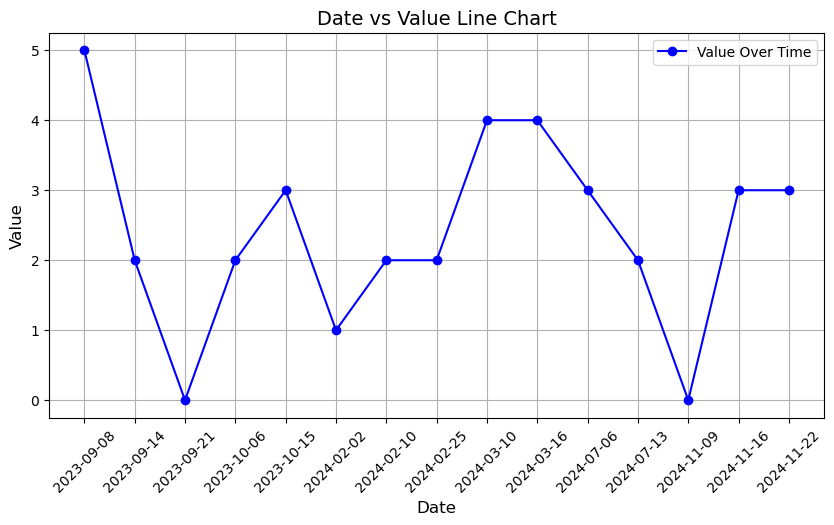

In [165]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter data for France and sort by date
france_data = train_data[train_data['team'] == 'France'].copy()  # Make a copy to avoid warnings
france_data = france_data.sort_values(by="date") 

# Create the plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(france_data.date, france_data.pg_dg, marker="o", linestyle="-", color="b", label="Value Over Time")  # Line plot

# Formatting the plot
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("Date vs Value Line Chart", fontsize=14)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [221]:
# Look at data
#train_data[train_data['team'] == 'France'].sort_values(by='date')

In [220]:
# Look at data
#train_data[train_data['team'] == 'Wales'].sort_values(by='date')

In [224]:
# Add in teams
def replace_index_with_team_name(index, mapping):
    # Match patterns like "atts[0]" or "defs[0]" and replace "0" with the team name
    if (index.startswith("atts[") 
        or index.startswith("atts_pg_dg[")
        or index.startswith("defs[") 
        or index.startswith("kick[") 
        or index.startswith("defs_pg_dg[") 
        or index.startswith("team_interaction[") 
       ):
        # Extract the parameter type (e.g., "atts" or "defs") and the team index
        param_type = index.split("[")[0]
        team_indices = index.split("[")[1].strip("]").split(",")
        #team_index = int(index.split("[")[1].strip("]"))  # Extract the number inside brackets
        
        # Find the corresponding team name from the mapping
        for team, num in mapping.items():
            if num == team_index:
                return f"{param_type}[{team}]"
    return index  # Leave other rows unchanged

In [225]:
# Show Summary
# Get summary of trace
# The model may need more data
# Hong Kong still have higher attack rating then England

import arviz as az

# Generate the summary of the posterior
summary_df = az.summary(trace.posterior, round_to=2)

#print(summary_df.columns)

# filter for columns
summary_df = summary_df[['mean','sd','hdi_3%','hdi_97%','r_hat']]

# Add in teams
def replace_index_with_team_name(index, mapping):
    # Match patterns like "atts[0]" or "defs[0,0]" and replace indices with team names
    if (index.startswith("atts[") 
        or index.startswith("atts_pg_dg[")
        or index.startswith("defs[") 
        or index.startswith("kick[") 
        or index.startswith("defs_pg_dg[") 
        or index.startswith("team_interaction[") 
       ):
        # Extract the parameter type (e.g., "atts" or "defs") and the team indices
        param_type = index.split("[")[0]
        team_indices = index.split("[")[1].strip("]").split(",")  # Extract numbers inside brackets
        
        # Replace each team index with its corresponding name
        team_names = []
        for team_index in team_indices:
            team_index = int(team_index)  # Convert to int
            for team, num in mapping.items():
                if num == team_index:
                    team_names.append(team)
                    break  # Stop searching once found
            else:
                team_names.append(str(team_index))  # Keep original number if no match
        
        # Reconstruct the updated parameter string
        return f"{param_type}[{','.join(team_names)}]"
    
    return index  # Leave other rows unchanged


summary_df = summary_df.rename(index=lambda x: replace_index_with_team_name(x, team_mapping))

# Save as csv
#summary_df.to_csv('summary_df_nb_team_opp.csv')

# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the updated DataFrame
#print(summary_df)



In [228]:
# Just show team interaction
summary_df[summary_df.index.str.startswith("team_interaction[Ireland,England")]

,mean,sd,hdi_3%,hdi_97%,r_hat
"team_interaction[Ireland,England]",-0.18,0.69,-2.17,0.55,1.37


In [229]:
# Just show team interaction
summary_df[summary_df.index.str.startswith("team_interaction[England,Ireland")]

,mean,sd,hdi_3%,hdi_97%,r_hat
"team_interaction[England,Ireland]",-0.07,0.44,-0.97,0.78,1.46


In [93]:
# Try and see what the predicted score is for NZ and Japan

atts_tries_sim = posterior_predictive_samples.posterior.atts_tries.stack(sample=("chain", "draw")).values
# Also get defs tries
defs_tries_sim = posterior_predictive_samples.posterior.defs_tries.stack(sample=("chain", "draw")).values




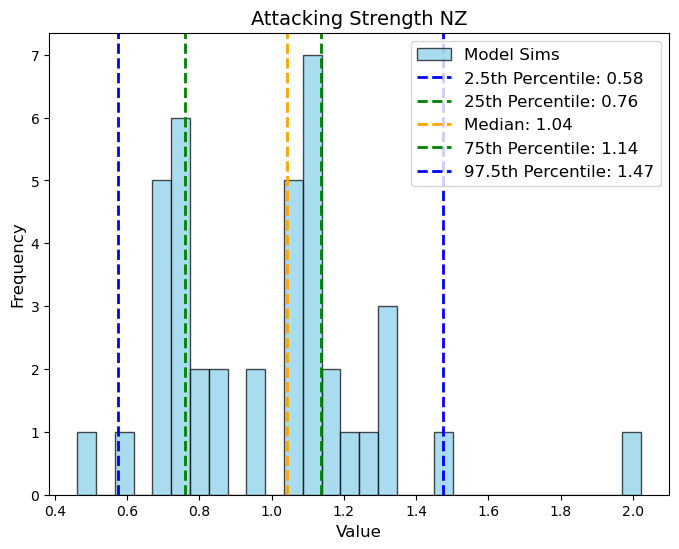

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# run a loop to run through scores
i = 15

# set data
sim_data = atts_tries_sim[i]

# Calculate 95% percentiles
lower_percentile = np.percentile(sim_data, 2.5)
upper_percentile = np.percentile(sim_data, 97.5)
lower_25 = np.percentile(sim_data, 25)
upper_75 = np.percentile(sim_data, 75)
median = np.percentile(sim_data, 50)


# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(sim_data, bins=30, color='skyblue',
         alpha=0.7, edgecolor='black', label='Model Sims')

# Add vertical lines for the percentiles
plt.axvline(lower_percentile, color='blue', linestyle='--', linewidth=2, label=f'2.5th Percentile: {lower_percentile:.2f}')
plt.axvline(lower_25, color='green', linestyle='--', linewidth=2, label=f'25th Percentile: {lower_25:.2f}')
plt.axvline(median, color='orange', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(upper_75, color='green', linestyle='--', linewidth=2, label=f'75th Percentile: {upper_75:.2f}')
plt.axvline(upper_percentile, color='blue', linestyle='--', linewidth=2, label=f'97.5th Percentile: {upper_percentile:.2f}')


# Add labels, title, and legend
plt.title('Attacking Strength NZ', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


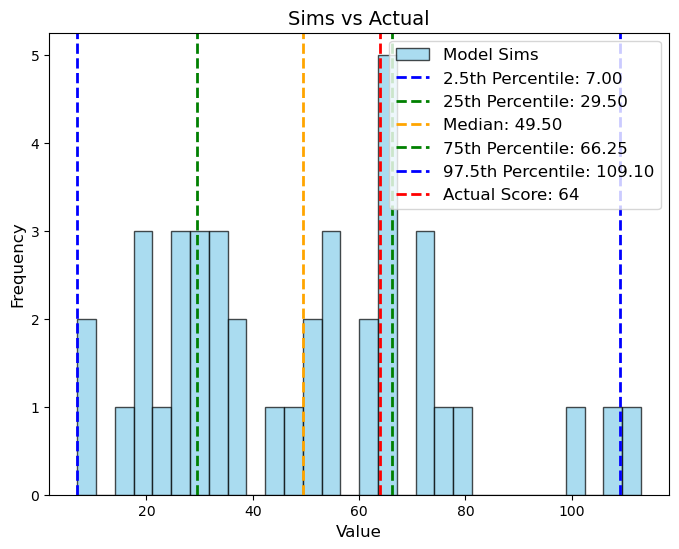

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# run a loop to run through scores
i = 1


# Calculate 95% percentiles
lower_percentile = np.percentile(ppc_test_model_score[i].values, 2.5)
upper_percentile = np.percentile(ppc_test_model_score[i].values, 97.5)
lower_25 = np.percentile(ppc_test_model_score[i].values, 25)
upper_75 = np.percentile(ppc_test_model_score[i].values, 75)
median = np.percentile(ppc_test_model_score[i].values, 50)


# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(ppc_test_model_score[i].values, bins=30, color='skyblue',
         alpha=0.7, edgecolor='black', label='Model Sims')

# Add vertical lines for the percentiles
plt.axvline(lower_percentile, color='blue', linestyle='--', linewidth=2, label=f'2.5th Percentile: {lower_percentile:.2f}')
plt.axvline(lower_25, color='green', linestyle='--', linewidth=2, label=f'25th Percentile: {lower_25:.2f}')
plt.axvline(median, color='orange', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(upper_75, color='green', linestyle='--', linewidth=2, label=f'75th Percentile: {upper_75:.2f}')
plt.axvline(upper_percentile, color='blue', linestyle='--', linewidth=2, label=f'97.5th Percentile: {upper_percentile:.2f}')


# Add a vertical line
plt.axvline(test_data_sample.score.iloc[i], color='red', linestyle='--', linewidth=2, 
            label=f'Actual Score: {test_data_sample.score.iloc[i]}')

# Add labels, title, and legend
plt.title('Sims vs Actual', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [100]:
# Predict the number of tries
tries_sim = ppc_test.posterior_predictive.tries_nb.stack(sample=("chain", "draw"))

# get sims for penalties and drop goals
pg_dg_sim = ppc_test.posterior_predictive.pg_dg_nb.stack(sample=("chain", "draw"))



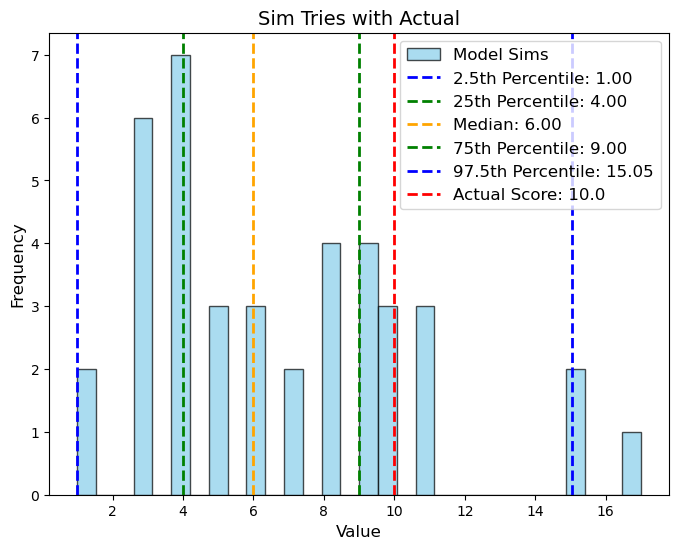

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# run a loop to run through scores
i = 1

# set data
sim_data = tries_sim[i].values

# Calculate 95% percentiles
lower_percentile = np.percentile(sim_data, 2.5)
upper_percentile = np.percentile(sim_data, 97.5)
lower_25 = np.percentile(sim_data, 25)
upper_75 = np.percentile(sim_data, 75)
median = np.percentile(sim_data, 50)


# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(sim_data, bins=30, color='skyblue',
         alpha=0.7, edgecolor='black', label='Model Sims')

# Add vertical lines for the percentiles
plt.axvline(lower_percentile, color='blue', linestyle='--', linewidth=2, label=f'2.5th Percentile: {lower_percentile:.2f}')
plt.axvline(lower_25, color='green', linestyle='--', linewidth=2, label=f'25th Percentile: {lower_25:.2f}')
plt.axvline(median, color='orange', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(upper_75, color='green', linestyle='--', linewidth=2, label=f'75th Percentile: {upper_75:.2f}')
plt.axvline(upper_percentile, color='blue', linestyle='--', linewidth=2, label=f'97.5th Percentile: {upper_percentile:.2f}')


# Add a vertical line
plt.axvline(test_data_sample.tries.iloc[i],
            color='red', linestyle='--', linewidth=2, 
            label=f'Actual Score: {test_data_sample.tries.iloc[i]}')

# Add labels, title, and legend
plt.title('Sim Tries with Actual', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


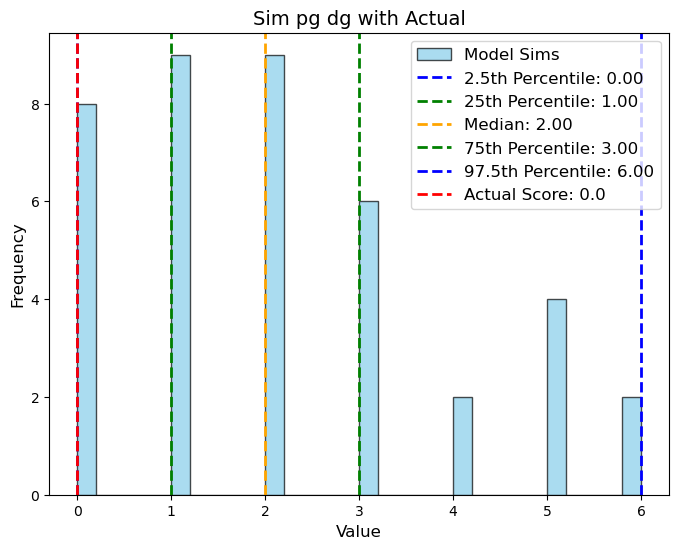

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# run a loop to run through scores
i = 0

# set data
sim_data = pg_dg_sim[i].values

# Calculate 95% percentiles
lower_percentile = np.percentile(sim_data, 2.5)
upper_percentile = np.percentile(sim_data, 97.5)
lower_25 = np.percentile(sim_data, 25)
upper_75 = np.percentile(sim_data, 75)
median = np.percentile(sim_data, 50)


# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(sim_data, bins=30, color='skyblue',
         alpha=0.7, edgecolor='black', label='Model Sims')

# Add vertical lines for the percentiles
plt.axvline(lower_percentile, color='blue', linestyle='--', linewidth=2, label=f'2.5th Percentile: {lower_percentile:.2f}')
plt.axvline(lower_25, color='green', linestyle='--', linewidth=2, label=f'25th Percentile: {lower_25:.2f}')
plt.axvline(median, color='orange', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(upper_75, color='green', linestyle='--', linewidth=2, label=f'75th Percentile: {upper_75:.2f}')
plt.axvline(upper_percentile, color='blue', linestyle='--', linewidth=2, label=f'97.5th Percentile: {upper_percentile:.2f}')


# Add a vertical line
plt.axvline(test_data_sample.pg_dg.iloc[i],
            color='red', linestyle='--', linewidth=2, 
            label=f'Actual Score: {test_data_sample.pg_dg.iloc[i]}')

# Add labels, title, and legend
plt.title('Sim pg dg with Actual', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()
